In [ ]:
%%capture
pip install easyfsl




In [22]:
print(343)

343


Images shape: torch.Size([32, 3, 84, 84])
Labels shape: torch.Size([32])
Class names: ['n01532829', 'n01558993', 'n01704323', 'n01749939', 'n01770081', 'n01843383', 'n01855672', 'n01910747', 'n01930112', 'n01981276', 'n02074367', 'n02089867', 'n02091244', 'n02091831', 'n02099601', 'n02101006', 'n02105505', 'n02108089', 'n02108551', 'n02108915', 'n02110063', 'n02110341', 'n02111277', 'n02113712', 'n02114548', 'n02116738', 'n02120079', 'n02129165', 'n02138441', 'n02165456', 'n02174001', 'n02219486', 'n02443484', 'n02457408', 'n02606052', 'n02687172', 'n02747177', 'n02795169', 'n02823428', 'n02871525', 'n02950826', 'n02966193', 'n02971356', 'n02981792', 'n03017168', 'n03047690', 'n03062245', 'n03075370', 'n03127925', 'n03146219', 'n03207743', 'n03220513', 'n03272010', 'n03337140', 'n03347037', 'n03400231', 'n03417042', 'n03476684', 'n03527444', 'n03535780', 'n03544143', 'n03584254', 'n03676483', 'n03770439', 'n03773504', 'n03775546', 'n03838899', 'n03854065', 'n03888605', 'n03908618', 'n0

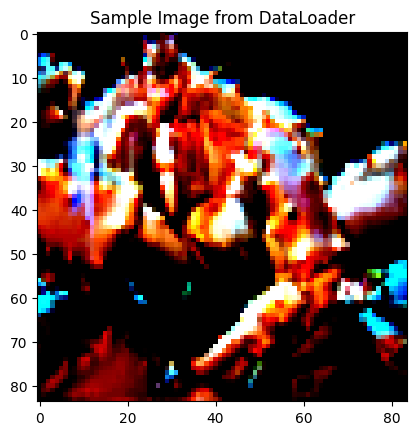

In [25]:
import os
import torch
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
import pytorch_lightning as pl
from easyfsl.utils import plot_images

# Define your transform
transform = transforms.Compose([
    transforms.Resize((84, 84)),  # Resize to match MiniImageNet standard
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

class DataModule(pl.LightningDataModule):
    def __init__(self, transform=transform, batch_size=32):
        super().__init__()
        self.root_dir = "/kaggle/input/miniimagenet"  # Adjust if needed
        self.transform = transform
        self.batch_size = batch_size

    def setup(self, stage=None):
        dataset = datasets.ImageFolder(root=self.root_dir, transform=self.transform)
        n_data = len(dataset)
        n_train = int(0.5 * n_data)
        n_valid = int(0.2 * n_data)
        n_test = n_data - n_train - n_valid

        train_dataset, val_dataset, test_dataset = torch.utils.data.random_split(dataset, [n_train, n_valid, n_test])

        self.train_dataset = DataLoader(train_dataset, batch_size=self.batch_size, shuffle=True)
        self.val_dataset = DataLoader(val_dataset, batch_size=self.batch_size)
        self.test_dataset = DataLoader(test_dataset, batch_size=self.batch_size)

    def train_dataloader(self):
        return self.train_dataset

    def val_dataloader(self):
        return self.val_dataset

    def test_dataloader(self):
        return self.test_dataset

# Instantiate the DataModule
data_module = DataModule()
data_module.setup()

# Get the train DataLoader
train_loader = data_module.train_dataloader()

# Get a batch of images and labels
try:
    images, labels = next(iter(train_loader))
    print(f"Images shape: {images.shape}")
    print(f"Labels shape: {labels.shape}")

    # Display the first image in the batch
    plot_images(images[0:1], "Sample Image from DataLoader", images_per_row=1) #slice to keep the batch dim and add images_per_row.

except StopIteration:
    print("Error: Could not retrieve a batch from the DataLoader.")
except Exception as e:
    print(f"An error occurred: {e}")

class_names = sorted(os.listdir('/kaggle/input/miniimagenet'))

print(f"Class names: {class_names}")

****model

Data split: 64 train classes, 16 val classes, 20 test classes.
Created filtered dataset with 38400 samples across 64 classes.
Created filtered dataset with 9600 samples across 16 classes.
Created filtered dataset with 12000 samples across 20 classes.
--- Backbone Architecture ---
-----------------------------
Using device: cuda

Fetching one task example from test set...
Plotting example images...

--- Example Task Ground Truth / Predicted (Task Labels 0 to N_WAY-1) ---
Query Image 0: GT = 1 / Pred = 1
Query Image 1: GT = 1 / Pred = 1
Query Image 2: GT = 1 / Pred = 1
Query Image 3: GT = 1 / Pred = 1
Query Image 4: GT = 1 / Pred = 1
Query Image 5: GT = 1 / Pred = 1
Query Image 6: GT = 1 / Pred = 1
Query Image 7: GT = 1 / Pred = 1
Query Image 8: GT = 1 / Pred = 1
Query Image 9: GT = 1 / Pred = 1
Query Image 10: GT = 3 / Pred = 3
Query Image 11: GT = 3 / Pred = 3
Query Image 12: GT = 3 / Pred = 3
Query Image 13: GT = 3 / Pred = 3
Query Image 14: GT = 3 / Pred = 3
Query Image 15: GT = 3 / 

Evaluating (Test): 100%|██████████| 100/100 [00:15<00:00,  6.42it/s, acc=82.20%]

Model Test on 100 tasks. Accuracy: 82.20% (4110/5000)
-----------------------------------------------


--- Starting Training for 10000 episodes ---



Training:  25%|██▍       | 2499/10000 [05:48<16:51,  7.42it/s, loss=0.3327]


--- Validating at episode 2500 ---



Training:  25%|██▌       | 2503/10000 [06:03<3:14:32,  1.56s/it, loss=0.3327]

Model Validation on 100 tasks. Accuracy: 83.18% (4159/5000)
✨ New best validation accuracy: 83.18%! Saving model...


Training:  50%|█████     | 5000/10000 [11:45<10:38,  7.84it/s, loss=0.2974]  


--- Validating at episode 5000 ---



Training:  50%|█████     | 5001/10000 [12:01<4:03:07,  2.92s/it, loss=0.2974]

Model Validation on 100 tasks. Accuracy: 83.24% (4162/5000)
✨ New best validation accuracy: 83.24%! Saving model...


Training:  75%|███████▍  | 7499/10000 [17:49<06:05,  6.84it/s, loss=0.2929]  


--- Validating at episode 7500 ---



Training:  75%|███████▌  | 7503/10000 [18:04<1:11:59,  1.73s/it, loss=0.2929]

Model Validation on 100 tasks. Accuracy: 81.80% (4090/5000)


Training: 100%|██████████| 10000/10000 [24:02<00:00,  6.93it/s, loss=0.2557] 

--- Training Finished ---

--- Loading best model based on validation accuracy ---

--- Evaluating on Test Set (After Training - Best/Final Model) ---



<ipython-input-34-f5f59a6648fe>:415: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load("prototypical_net_miniimagenet_best.pth", map_location=d

Model Test Final on 100 tasks. Accuracy: 78.24% (3912/5000)
-----------------------------------------------------------------



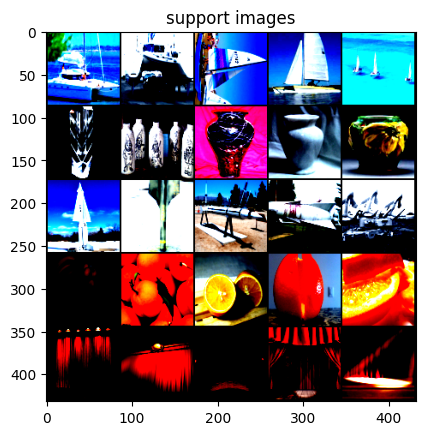

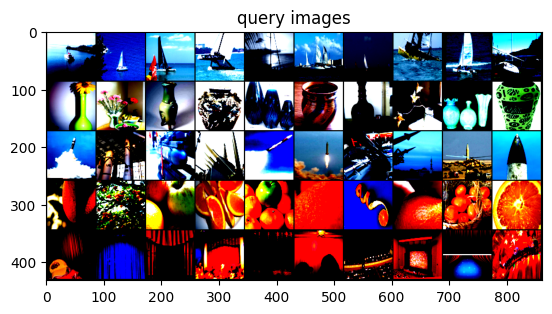

In [34]:
import torch
from torch import nn, optim
from torch.utils.data import DataLoader, Dataset # Import Dataset
from torchvision import transforms
from torchvision.datasets import ImageFolder # Still useful for finding data
# Import specific loader function if needed, or handle image loading manually
from torchvision.datasets.folder import default_loader 
from torchvision.models import resnet18
from tqdm import tqdm
import os
import random # Import random for shuffling classes
from typing import List, Tuple, Dict, Callable # For type hinting

from easyfsl.samplers import TaskSampler
from easyfsl.utils import plot_images, sliding_average

# --- Configuration ---
DATA_ROOT = "/kaggle/input/miniimagenet" # Adjust if needed
if not os.path.isdir(DATA_ROOT):
     raise FileNotFoundError(f"DATA_ROOT path not found: {DATA_ROOT}. Ensure Mini-ImageNet classes are directly inside.")

# Standard Mini-ImageNet split configuration
NUM_TRAIN_CLASSES = 64
NUM_VAL_CLASSES = 16
NUM_TEST_CLASSES = 20
TOTAL_CLASSES = NUM_TRAIN_CLASSES + NUM_VAL_CLASSES + NUM_TEST_CLASSES
RANDOM_SEED = 42 # Use a fixed seed for reproducible splits

# Mini-ImageNet standard image size
image_size = 84

# Normalization constants for ImageNet
imagenet_mean = [0.485, 0.456, 0.406]
imagenet_std = [0.229, 0.224, 0.225]

# Define transforms
train_transform = transforms.Compose(
    [
        transforms.RandomResizedCrop(image_size),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize(imagenet_mean, imagenet_std),
    ]
)

# Use same transforms for validation and test
val_test_transform = transforms.Compose(
    [
        transforms.Resize([int(image_size * 1.15), int(image_size * 1.15)]),
        transforms.CenterCrop(image_size),
        transforms.ToTensor(),
        transforms.Normalize(imagenet_mean, imagenet_std),
    ]
)


# --- Data Splitting Logic ---

def get_miniimagenet_splits(root: str, seed: int) -> Tuple[List[str], List[str], List[str]]:
    """
    Finds all classes in the root directory, shuffles them, and splits them
    into train, validation, and test class name lists.
    """
    # Ensure reproducibility
    random.seed(seed)

    # Find all class subdirectories
    all_classes = [d for d in os.listdir(root) if os.path.isdir(os.path.join(root, d))]

    if len(all_classes) < TOTAL_CLASSES:
        raise ValueError(f"Expected at least {TOTAL_CLASSES} classes in {root}, but found only {len(all_classes)}. Check dataset structure.")
    elif len(all_classes) > TOTAL_CLASSES:
         print(f"Warning: Found {len(all_classes)} classes in {root}, expected {TOTAL_CLASSES}. Using the first {TOTAL_CLASSES} after shuffling.")
         # We still shuffle all found classes before slicing to maintain randomness
         random.shuffle(all_classes)
         all_classes = all_classes[:TOTAL_CLASSES] # Ensure we only use 100
    else:
         # Shuffle the classes found
         random.shuffle(all_classes)

    # Split the shuffled class names
    train_classes = all_classes[:NUM_TRAIN_CLASSES]
    val_classes = all_classes[NUM_TRAIN_CLASSES : NUM_TRAIN_CLASSES + NUM_VAL_CLASSES]
    test_classes = all_classes[NUM_TRAIN_CLASSES + NUM_VAL_CLASSES :]

    print(f"Data split: {len(train_classes)} train classes, {len(val_classes)} val classes, {len(test_classes)} test classes.")
    return train_classes, val_classes, test_classes

# Perform the split
train_class_names, val_class_names, test_class_names = get_miniimagenet_splits(DATA_ROOT, RANDOM_SEED)

# --- Custom Filtered Dataset ---

class FilteredImageDataset(Dataset):
    """
    A dataset that filters samples from ImageFolder based on a list of allowed class names.
    It preserves the original class index mapping from the full dataset.
    """
    def __init__(self, root: str, allowed_class_names: List[str], transform: Callable = None):
        self.transform = transform
        self.loader = default_loader # Function to load an image from path

        # Use ImageFolder to find all samples initially, then filter
        # This is slightly less efficient than a fully custom find_classes/make_dataset
        # but simpler to implement using existing tools.
        full_dataset = ImageFolder(root) # Load once to get structure
        self.class_to_idx: Dict[str, int] = full_dataset.class_to_idx
        
        # Get the integer indices corresponding to the allowed class names
        allowed_class_indices = {self.class_to_idx[cls_name] for cls_name in allowed_class_names if cls_name in self.class_to_idx}

        # Filter samples: keep only those whose target class index is in the allowed set
        self.samples: List[Tuple[str, int]] = [
            (path, target) for path, target in full_dataset.samples if target in allowed_class_indices
        ]

        if not self.samples:
             raise RuntimeError(f"No samples found for the allowed classes in {root}. Check class names and dataset structure.")
             
        # Store the filtered labels separately for easy access by TaskSampler
        self.targets = [target for _, target in self.samples]
        print(f"Created filtered dataset with {len(self.samples)} samples across {len(allowed_class_indices)} classes.")

    def __len__(self) -> int:
        return len(self.samples)

    def __getitem__(self, index: int) -> Tuple[torch.Tensor, int]:
        path, target = self.samples[index]
        sample = self.loader(path) # Load image using the default loader
        if self.transform is not None:
            sample = self.transform(sample) # Apply transformations

        return sample, target # Return image tensor and its *original* class index

    def get_labels(self) -> List[int]:
        """
        Returns the list of original class indices for the samples in this dataset split.
        Required by TaskSampler.
        """
        return self.targets


# --- Instantiate Datasets for each split ---
train_set = FilteredImageDataset(DATA_ROOT, train_class_names, train_transform)
val_set = FilteredImageDataset(DATA_ROOT, val_class_names, val_test_transform)
test_set = FilteredImageDataset(DATA_ROOT, test_class_names, val_test_transform)


# --- PrototypicalNetworks Class (Remains the same) ---
class PrototypicalNetworks(nn.Module):
    def __init__(self, backbone: nn.Module):
        super(PrototypicalNetworks, self).__init__()
        self.backbone = backbone

    def forward(
        self,
        support_images: torch.Tensor,
        support_labels: torch.Tensor,
        query_images: torch.Tensor,
    ) -> torch.Tensor:
        z_support = self.backbone.forward(support_images)
        z_query = self.backbone.forward(query_images)
        n_way = len(torch.unique(support_labels))
        # Ensure labels being iterated are present in support_labels
        present_labels = torch.unique(support_labels)
        z_proto = torch.stack( # Use torch.stack instead of cat
            [
                z_support[torch.nonzero(support_labels == label).squeeze(1)].mean(0)
                # Iterate through labels actually present in the support set for this task
                for label in present_labels 
            ]
        )
        # Note: The prototypes will correspond to the *remapped* labels (0 to n_way-1)
        # provided by the TaskSampler's collate_fn, not the original dataset indices.
        # This loop relies on support_labels already being remapped.
        dists = torch.cdist(z_query, z_proto)
        scores = -dists
        return scores

# --- Backbone Model ---
convolutional_network = resnet18(pretrained=True)
convolutional_network.fc = nn.Flatten()
print("--- Backbone Architecture ---")
# print(convolutional_network) # Keep commented out for brevity if needed
print("-----------------------------")


# --- Device Setup ---
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using device: {device}")
model = PrototypicalNetworks(convolutional_network).to(device)

# --- Task Parameters ---
N_WAY = 5
N_SHOT = 5
N_QUERY = 10
N_EVALUATION_TASKS = 100
N_TRAINING_EPISODES = 10000 # Increase for real training
N_VALIDATION_TASKS = 100

# --- Samplers and Dataloaders ---
# TaskSampler uses the get_labels() method we added to our custom datasets
train_sampler = TaskSampler(
    train_set, n_way=N_WAY, n_shot=N_SHOT, n_query=N_QUERY, n_tasks=N_TRAINING_EPISODES
)
val_sampler = TaskSampler(
     val_set, n_way=N_WAY, n_shot=N_SHOT, n_query=N_QUERY, n_tasks=N_VALIDATION_TASKS
)
test_sampler = TaskSampler(
    test_set, n_way=N_WAY, n_shot=N_SHOT, n_query=N_QUERY, n_tasks=N_EVALUATION_TASKS
)

NUM_WORKERS = min(os.cpu_count(), 8) if os.cpu_count() else 4

train_loader = DataLoader(
    train_set,
    batch_sampler=train_sampler,
    num_workers=NUM_WORKERS,
    pin_memory=True,
    collate_fn=train_sampler.episodic_collate_fn,
)
val_loader = DataLoader(
     val_set,
     batch_sampler=val_sampler,
     num_workers=NUM_WORKERS,
     pin_memory=True,
     collate_fn=val_sampler.episodic_collate_fn,
)
test_loader = DataLoader(
    test_set,
    batch_sampler=test_sampler,
    num_workers=NUM_WORKERS,
    pin_memory=True,
    collate_fn=test_sampler.episodic_collate_fn,
)

# --- Example Task Visualization (from Test Set) ---
print("\nFetching one task example from test set...")
try:
    # Get data: support images, support labels (remapped 0..N_WAY-1), query images, query labels (remapped 0..N_WAY-1), original class IDs present in the task
    (
        example_support_images,
        example_support_labels, # These labels are 0 to N_WAY-1 for the task
        example_query_images,
        example_query_labels,  # These labels are 0 to N_WAY-1 for the task
        example_original_class_ids, # Original dataset indices for the N_WAY classes
    ) = next(iter(test_loader))

    print("Plotting example images...")
    # These should work as before
    plot_images(example_support_images, "support images", images_per_row=N_SHOT)
    plot_images(example_query_images, "query images", images_per_row=N_QUERY)

    # --- Example Prediction ---
    model.eval()
    with torch.no_grad():
        example_scores = model(
            example_support_images.to(device),
            example_support_labels.to(device), # Use the remapped labels
            example_query_images.to(device),
        ).detach()

    _, example_predicted_labels = torch.max(example_scores.cpu().data, 1)

    # Print results using the remapped labels (0 to N_WAY-1) as class names aren't easily available
    print("\n--- Example Task Ground Truth / Predicted (Task Labels 0 to N_WAY-1) ---")
    # example_query_labels and example_predicted_labels are already the task-specific labels
    for i in range(len(example_query_labels)):
         print(f"Query Image {i}: GT = {example_query_labels[i].item()} / Pred = {example_predicted_labels[i].item()}")
         # To show original class ID: Find which original ID corresponds to the GT/Pred task label
         # gt_original_id = example_original_class_ids[example_query_labels[i].item()]
         # pred_original_id = example_original_class_ids[example_predicted_labels[i].item()]
         # print(f"  (Original Class IDs: GT={gt_original_id} / Pred={pred_original_id})") # Uncomment if useful
    print("-------------------------------------------------------------------------\n")


except StopIteration:
    print("Could not fetch an example task. Check DataLoader and TaskSampler setup.")
except Exception as e:
    print(f"An error occurred during example task processing: {e}")
    import traceback
    traceback.print_exc()


# --- Evaluation Function (Remains largely the same) ---
# Uses remapped labels from the dataloader's collate_fn
def evaluate_on_one_task(
    support_images: torch.Tensor,
    support_labels: torch.Tensor, # Remapped labels (0..N_WAY-1)
    query_images: torch.Tensor,
    query_labels: torch.Tensor,   # Remapped labels (0..N_WAY-1)
    # original_class_ids: torch.Tensor # Not needed for accuracy calculation
) -> Tuple[int, int]:
    """
    Returns the number of correct predictions and total predictions for one task.
    Assumes inputs are already on the correct device or handled within the function.
    """
    # Ensure model is on the correct device already
    scores = model(support_images.to(device), support_labels.to(device), query_images.to(device)).detach()
    _, predicted_labels = torch.max(scores.data, 1) # Predictions are task labels (0..N_WAY-1)
    
    # Compare with ground truth task labels
    correct_count = (predicted_labels == query_labels.to(device)).sum().item()
    total_count = len(query_labels)
    return correct_count, total_count

# --- Full Evaluation Loop (Remains largely the same) ---
def evaluate(data_loader: DataLoader, stage: str = "Test"):
    total_predictions = 0
    correct_predictions = 0
    model.eval()
    with torch.no_grad():
        with tqdm(enumerate(data_loader), total=len(data_loader), desc=f"Evaluating ({stage})") as tqdm_eval:
            for episode_index, (
                support_images,
                support_labels, # Remapped labels
                query_images,
                query_labels,   # Remapped labels
                _original_class_ids, # Unused here
            ) in tqdm_eval:
                correct, total = evaluate_on_one_task(
                    support_images, support_labels, query_images, query_labels
                )
                total_predictions += total
                correct_predictions += correct
                if total_predictions > 0:
                   current_acc = 100.0 * correct_predictions / total_predictions
                   tqdm_eval.set_postfix(acc=f"{current_acc:.2f}%")
                   
    if total_predictions == 0:
        print(f"No tasks evaluated in {stage}. Accuracy: 0.00%")
        return 0.0
    else:
        accuracy = 100.0 * correct_predictions / total_predictions
        print(
            f"Model {stage} on {len(data_loader)} tasks. Accuracy: {accuracy:.2f}% ({correct_predictions}/{total_predictions})"
        )
        return accuracy


print("\n--- Evaluating on Test Set (Before Training) ---")
evaluate(test_loader, stage="Test")
print("-----------------------------------------------\n")


# --- Training Setup (Remains largely the same) ---
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=1e-4) # Start with a smaller LR for fine-tuning

# --- Training Step Function (Remains the same) ---
# Uses remapped labels from the dataloader's collate_fn
def fit(
    support_images: torch.Tensor,
    support_labels: torch.Tensor, # Remapped labels (0..N_WAY-1)
    query_images: torch.Tensor,
    query_labels: torch.Tensor,   # Remapped labels (0..N_WAY-1)
    # original_class_ids: torch.Tensor # Not needed for loss calculation
) -> float:
    optimizer.zero_grad()
    # Pass remapped support labels to the model
    classification_scores = model(
        support_images.to(device), support_labels.to(device), query_images.to(device)
    )
    # Calculate loss against remapped query labels
    loss = criterion(classification_scores, query_labels.to(device))
    loss.backward()
    optimizer.step()
    return loss.item()


# --- Training Loop (Remains largely the same) ---
print(f"\n--- Starting Training for {N_TRAINING_EPISODES} episodes ---")
log_update_frequency = 100
all_loss = []
best_val_accuracy = -1.0 # Track best validation accuracy

model.train()
with tqdm(enumerate(train_loader), total=len(train_loader), desc="Training") as tqdm_train:
    for episode_index, (
        support_images,
        support_labels, # Remapped labels
        query_images,
        query_labels,   # Remapped labels
        _ # Original Class IDs - not needed for fit function
    ) in tqdm_train:
        loss_value = fit(support_images, support_labels, query_images, query_labels)
        all_loss.append(loss_value)

        if episode_index % log_update_frequency == 0 and episode_index > 0:
            avg_loss = sliding_average(all_loss, log_update_frequency)
            tqdm_train.set_postfix(loss=f"{avg_loss:.4f}")

        # Optional: Periodic Validation
        if episode_index % (len(train_loader) // 4) == 0 and episode_index > 0: # Validate a few times per epoch
             print(f"\n--- Validating at episode {episode_index} ---")
             current_val_accuracy = evaluate(val_loader, stage="Validation")
             if current_val_accuracy > best_val_accuracy:
                 best_val_accuracy = current_val_accuracy
                 print(f"✨ New best validation accuracy: {best_val_accuracy:.2f}%! Saving model...")
                 # Save the model checkpoint
                 try:
                     torch.save(model.state_dict(), "prototypical_net_miniimagenet_best.pth")
                 except Exception as e:
                      print(f"Error saving model: {e}")
             # Set model back to training mode after evaluation
             model.train()


print("--- Training Finished ---")

# --- Final Evaluation ---
# Optionally load the best model based on validation
try:
    print("\n--- Loading best model based on validation accuracy ---")
    model.load_state_dict(torch.load("prototypical_net_miniimagenet_best.pth", map_location=device))
except FileNotFoundError:
    print("No best model checkpoint found ('prototypical_net_miniimagenet_best.pth'). Evaluating the final model.")
except Exception as e:
    print(f"Error loading best model checkpoint: {e}. Evaluating the final model.")


print("\n--- Evaluating on Test Set (After Training - Best/Final Model) ---")
evaluate(test_loader, stage="Test Final")
print("-----------------------------------------------------------------\n")